# Visão Computacional

# Importação das bibliotecas

- Adaptado de: https://www.tensorflow.org/beta/tutorials/generative/deepdream

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.6.0'

# Carregamento da rede neural convolucional pré-treinada

- InceptionNet: https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3
- Artigo original: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Szegedy_Rethinking_the_Inception_CVPR_2016_paper.pdf
- Imagenet: http://www.image-net.org/

In [ ]:
modelo_base = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
modelo_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
len(modelo_base.layers)

311

In [ ]:
#names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']
names = ['mixed3', 'mixed5'] # Relu

In [ ]:
modelo_base.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
layers = [modelo_base.get_layer(nome).output for nome in names]
layers

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [ ]:
deep_dream_model = tf.keras.Model(inputs = modelo_base.input, outputs = layers)

In [ ]:
deep_dream_model.output

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

# Carregamento e pré-processamento da imagem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imagem = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Images/StaryNight.jpg',
                                               target_size=(225,375))

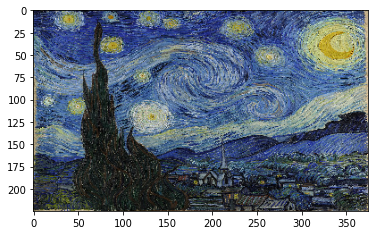

In [ ]:
plt.imshow(imagem);

In [ ]:
type(imagem)

PIL.Image.Image

In [ ]:
imagem.size

(375, 225)

In [ ]:
imagem.mode, len(imagem.mode)

('RGB', 3)

In [ ]:
list(imagem.getdata())

[(6, 10, 11),
 (29, 33, 68),
 (35, 46, 66),
 (38, 46, 65),
 (46, 49, 68),
 (23, 29, 29),
 (13, 16, 31),
 (57, 62, 84),
 (85, 87, 99),
 (147, 146, 142),
 (141, 136, 130),
 (108, 118, 117),
 (16, 22, 58),
 (19, 29, 64),
 (82, 97, 120),
 (79, 94, 125),
 (147, 150, 169),
 (28, 31, 76),
 (57, 62, 104),
 (13, 20, 39),
 (37, 38, 68),
 (21, 30, 61),
 (4, 11, 53),
 (25, 32, 74),
 (48, 50, 99),
 (134, 132, 182),
 (127, 131, 156),
 (126, 133, 159),
 (138, 151, 170),
 (64, 76, 124),
 (67, 82, 123),
 (60, 75, 114),
 (75, 90, 133),
 (84, 119, 141),
 (52, 83, 78),
 (137, 156, 128),
 (51, 66, 71),
 (149, 170, 199),
 (153, 176, 220),
 (53, 81, 128),
 (90, 117, 170),
 (68, 94, 127),
 (161, 175, 175),
 (142, 155, 190),
 (92, 118, 133),
 (50, 72, 129),
 (107, 133, 158),
 (99, 122, 153),
 (27, 36, 67),
 (34, 45, 77),
 (95, 116, 133),
 (21, 41, 66),
 (52, 59, 103),
 (50, 55, 110),
 (34, 39, 69),
 (22, 24, 49),
 (3, 2, 33),
 (4, 7, 26),
 (28, 37, 36),
 (19, 27, 30),
 (19, 24, 44),
 (43, 48, 78),
 (93, 104, 1

In [ ]:
imagem = tf.keras.preprocessing.image.img_to_array(imagem)

In [ ]:
type(imagem)

numpy.ndarray

In [ ]:
imagem.shape

(225, 375, 3)

In [ ]:
imagem.min(), imagem.max()

(0.0, 255.0)

In [ ]:
#imagem = imagem / 255
imagem = tf.keras.applications.inception_v3.preprocess_input(imagem)

In [ ]:
imagem.min(), imagem.max()

(-1.0, 1.0)

# Ativações da rede neural

In [ ]:
imagem.shape

(225, 375, 3)

In [ ]:
imagem_batch = tf.expand_dims(imagem, axis = 0)
imagem_batch.shape

TensorShape([1, 225, 375, 3])

In [ ]:
ativacoes = deep_dream_model.predict(imagem_batch)

In [ ]:
deep_dream_model.outputs

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [ ]:
len(ativacoes)

2

In [ ]:
ativacoes[1]

array([[[[0.        , 0.        , 1.4696335 , ..., 0.        ,
          0.        , 0.        ],
         [2.4891298 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [1.0993054 , 0.        , 0.3503037 , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.25634432, ..., 1.2101831 ,
          0.        , 0.        ],
         [0.        , 0.16377124, 0.6175299 , ..., 0.8696373 ,
          0.        , 0.        ],
         [0.1344688 , 0.        , 1.6310143 , ..., 0.53793836,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.577307  , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 1.2298588 ,
          0.        , 0.0

In [ ]:
ativacoes[0].shape, ativacoes[1].shape

((1, 12, 21, 768), (1, 12, 21, 768))

# Cálculo do erro (loss)

In [ ]:
def calcula_erro(imagem, network):
  imagem_batch = tf.expand_dims(imagem, axis = 0)
  ativacoes = network(imagem_batch)
  erros = []
  for ativacao in ativacoes:
    media = tf.math.reduce_mean(ativacao)
    erros.append(media)
  
  #print(erros)
  #print(np.shape(erros))
  #print(tf.reduce_sum(erros))

  return tf.reduce_sum(erros)

In [ ]:
0.45195404 + 0.16485052

0.6168045600000001

In [ ]:
loss = calcula_erro(imagem, deep_dream_model)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.61680454>

# Subida do gradiente

In [ ]:
@tf.function
def deep_dream(network, imagem, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(imagem)
    erro = calcula_erro(imagem, network)

  gradientes = tape.gradient(erro, imagem) # Derivada
  gradientes /= tf.math.reduce_std(gradientes)
  imagem = imagem + gradientes * learning_rate
  imagem = tf.clip_by_value(imagem, -1, 1)

  return erro, imagem

In [ ]:
def converte_imagem(imagem):
  imagem = 255 * (imagem + 1.0) / 2.0
  return tf.cast(imagem, tf.uint8)

In [ ]:
def executa_deep_dream(network, imagem, epocas, learning_rate):
  for epoca in range(epocas):
    erro, imagem = deep_dream(network, imagem, learning_rate)
    if epoca % 200 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(converte_imagem(imagem))
      plt.show()
      print('Época {}, loss {}'.format(epoca, erro))

# Geração das imagens

In [ ]:
executa_deep_dream(deep_dream_model, imagem, 8000, 0.001)

# Exercício

In [ ]:
imagem = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/sky.jpeg',
                                              target_size = (225, 375))

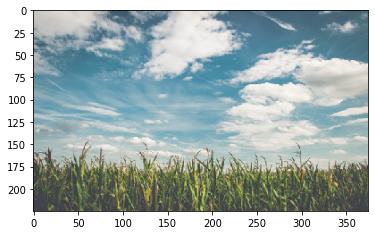

In [ ]:
plt.imshow(imagem);

In [ ]:
imagem = tf.keras.preprocessing.image.img_to_array(imagem)
imagem = tf.keras.applications.inception_v3.preprocess_input(imagem)

In [ ]:
executa_deep_dream(deep_dream_model, imagem, 8000, 0.001)